In [1]:
INPUT_DIR = '/kaggle/input/spaceship-titanic'

In [2]:
import os
import math
import pandas as pd
from matplotlib import pyplot as plt

### EDA

##### Data Description

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- *PassengerId* - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- *HomePlanet* - The planet the passenger departed from, typically their planet of permanent residence.
- *CryoSleep* - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- *Cabin* - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- *Destination* - The planet the passenger will be debarking to.
- *Age* - The age of the passenger.
- *VIP* - Whether the passenger has paid for special VIP service during the voyage.
- *RoomService*, *FoodCourt*, *ShoppingMall*, *Spa*, *VRDeck* - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- *Name* - The first and last names of the passenger.
- *Transported* - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
train_full = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
print(f'>> Loaded {train_full.shape[0]} passenger records.')
train_full = train_full.set_index('PassengerId')
train_full.head(10)

>> Loaded 8693 passenger records.


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True


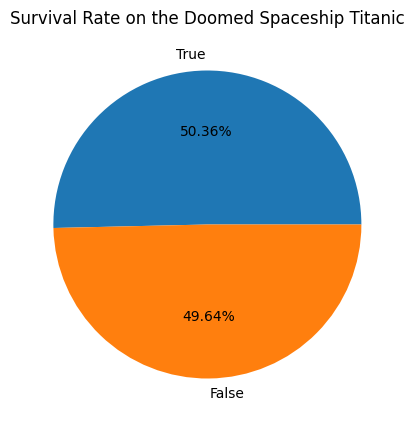

In [4]:
train_full.Transported.value_counts().plot.pie(title='Survival Rate on the Doomed Spaceship Titanic', autopct='%1.2f%%', figsize=(5, 5), ylabel='');

##### There is almost an overall 50/50 chance of survival, which simplifies the study of correlations between the different attributes (individually) and the target variable.

In [5]:
def disp_dist(feature, feat_type):
    if feat_type == 'categorical':
        pos_freq_tab = train_full.loc[train_full.Transported][feature].value_counts()
        neg_freq_tab = train_full.loc[~train_full.Transported][feature].value_counts()
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        pos_freq_tab.plot.pie(title=f'{feature} Distribution - Transported', ax=axs[0], autopct='%1.2f%%', ylabel='')
        neg_freq_tab.plot.pie(title=f'{feature} Distribution - Did Not Make It', ax=axs[1], autopct='%1.2f%%', ylabel='')
    elif feat_type == 'numerical':
        train_full.boxplot(column=feature, by='Transported')

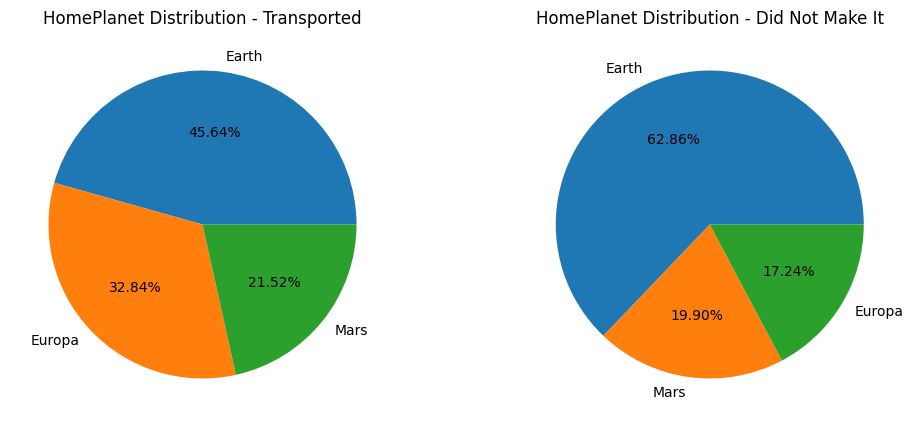

In [6]:
disp_dist('HomePlanet', 'categorical')

##### It seems like people from Earth didn't have much luck compared to people from Europa!  

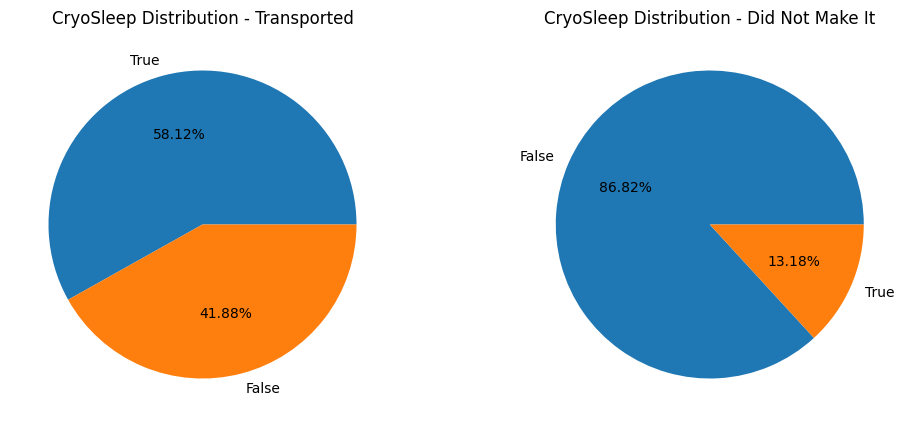

In [7]:
disp_dist('CryoSleep', 'categorical')

##### That looks significant! CryoSleep was worth it after all!

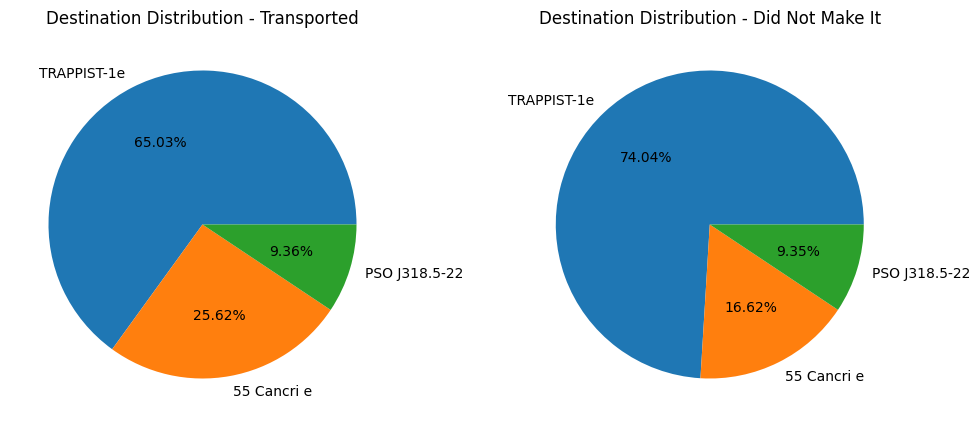

In [8]:
disp_dist('Destination', 'categorical')

##### The propabilities shift a little bit in favor of **55 Cancri e** and against **TRAPPIST-1e** but not significantly.

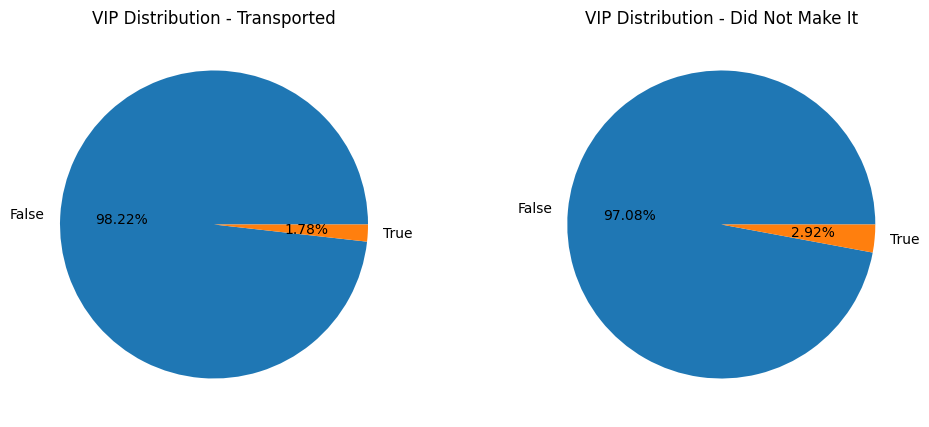

In [9]:
disp_dist('VIP', 'categorical')

##### There weren't many VIP passengers after all, assuming that you would have had less chance of survival of you were VIP based on such small percentages might be misleading.

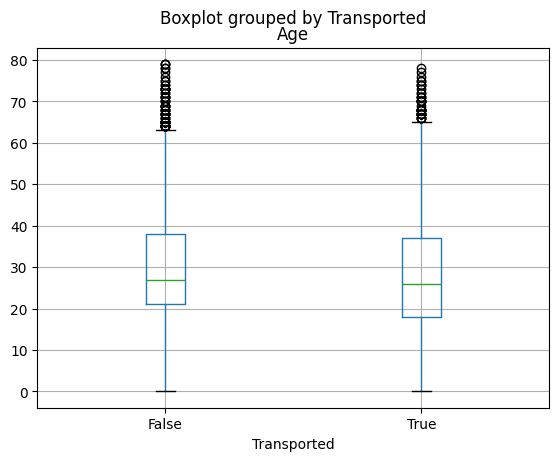

In [10]:
disp_dist('Age', 'numerical')

##### The median and two quartiles for age were not very different between the two group. This feature is not very distinctive by itself either.

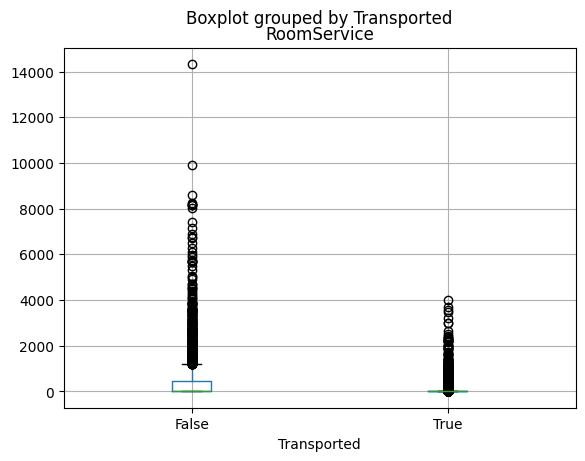

In [11]:
disp_dist('RoomService', 'numerical')

##### Interesting! People who spent more on room service had less chance of serviving.

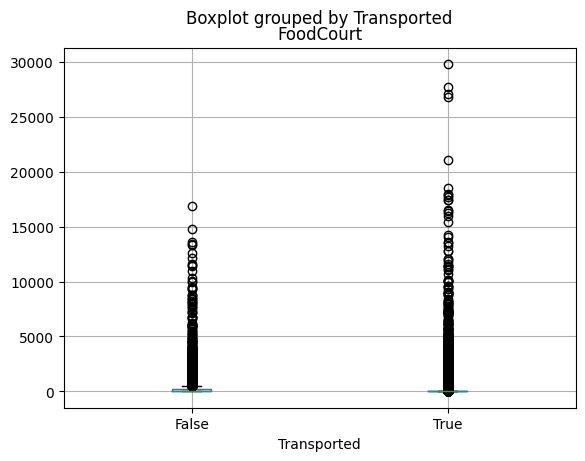

In [12]:
disp_dist('FoodCourt', 'numerical')

##### This one is kind of opposite to the previous one.

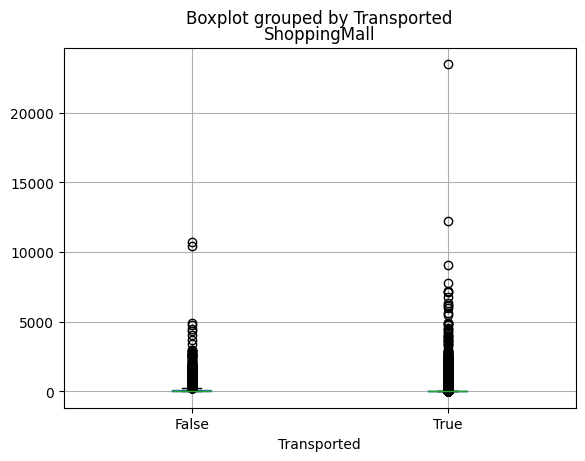

In [13]:
disp_dist('ShoppingMall', 'numerical')

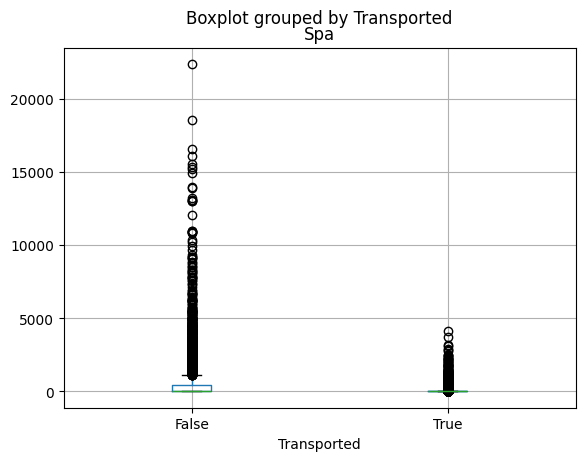

In [14]:
disp_dist('Spa', 'numerical')

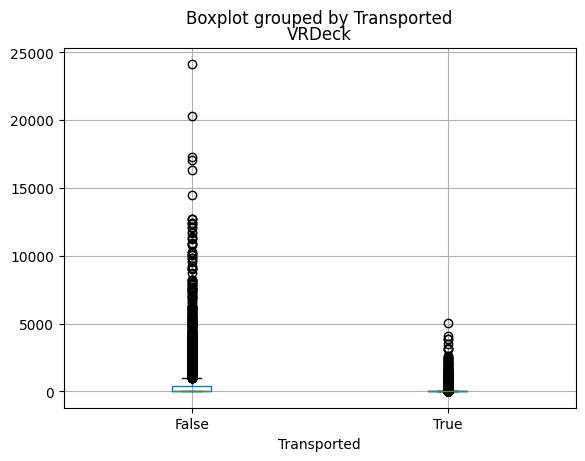

In [15]:
disp_dist('VRDeck', 'numerical')

##### I am not sure how to read that last group of features visualized in boxplots. They seem to collectively suggest that passengers who spent more money on the ship's luxury amenities,
##### which might be thought of as an idnication of wealth, had less chance of survival, which might seem counterintuitive at the first glance. Let's try to have a bit of a more suggestive
##### correlcation by looking at the total amount a passenger spent on aminities.

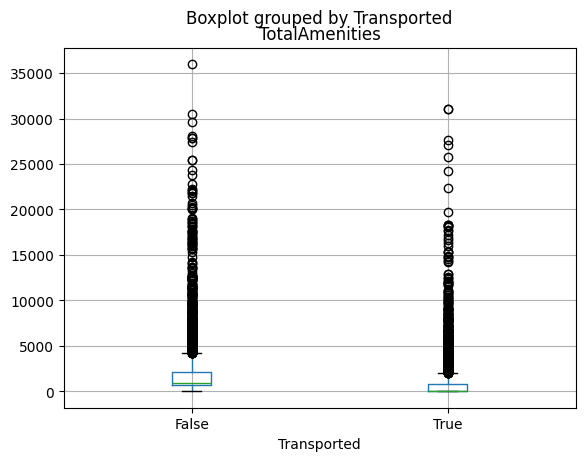

In [16]:
train_full['RoomService'] = train_full.RoomService.fillna(0)
train_full['FoodCourt'] = train_full.FoodCourt.fillna(0)
train_full['ShoppingMall'] = train_full.ShoppingMall.fillna(0)
train_full['Spa'] = train_full.Spa.fillna(0)
train_full['VRDeck'] = train_full.VRDeck.fillna(0)
train_full['TotalAmenities'] = train_full.apply(lambda row: row['RoomService'] + row['FoodCourt'] + row['ShoppingMall'] + row['Spa'] + row['VRDeck'], axis=1)
disp_dist('TotalAmenities', 'numerical')

##### That was not more informative at all! There is no need to keep that added feature. If anything it might confuse the model since it's strongly correlated with a number of other features. 

In [17]:
del train_full['TotalAmenities']

In [18]:
print(f'>> There were {train_full.Cabin.nunique()} cabinets on the spaceship')

>> There were 6560 cabinets on the spaceship


##### I thought passengers might have been divided into large enough groups to look for statistics about their survival, but they turned out to be very small!
##### Almost a group for each 1.4 patients, which is not very descriptive. BUT, it's a composition of a letter/number/letter. Let's break it down and see if
##### we can find anything interesting.

In [19]:
clean_cabin = train_full.loc[~train_full.Cabin.isna()].Cabin
train_full['Cabin_X'] = clean_cabin.map(lambda c: c.split('/')[0])
train_full['Cabin_Y'] = clean_cabin.map(lambda c: c.split('/')[1])
train_full['Cabin_Y'] = train_full.Cabin_Y.fillna('0').map(lambda cy: int(cy))
train_full['Cabin_Z'] = clean_cabin.map(lambda c: c.split('/')[2])
print(f'>> Unique values, Cabin Part1: {train_full.Cabin_X.nunique()}, Cabin Part2: {train_full.Cabin_Y.nunique()}, Cabin Part3: {train_full.Cabin_Z.nunique()}')

>> Unique values, Cabin Part1: 8, Cabin Part2: 1817, Cabin Part3: 2


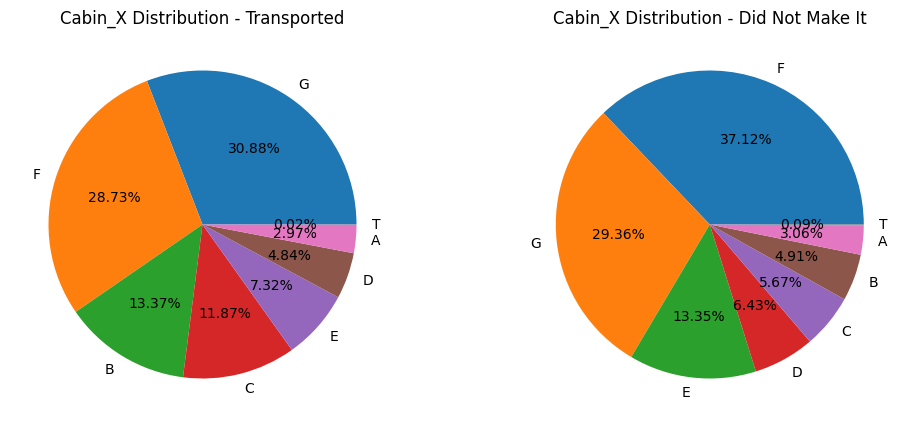

In [20]:
disp_dist('Cabin_X', 'categorical')

##### Interesting! Something about cabin numbers that started with "F" or "E" made their residents have less chance of survival. 

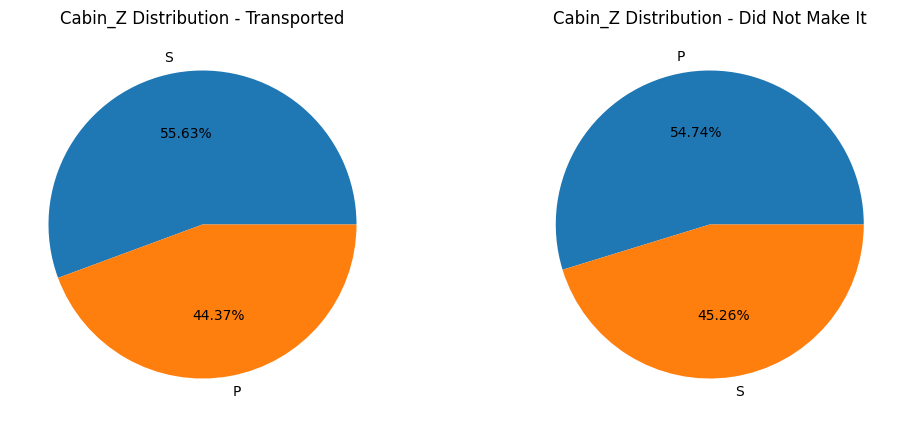

In [21]:
disp_dist('Cabin_Z', 'categorical')

##### Not very interesting by itself

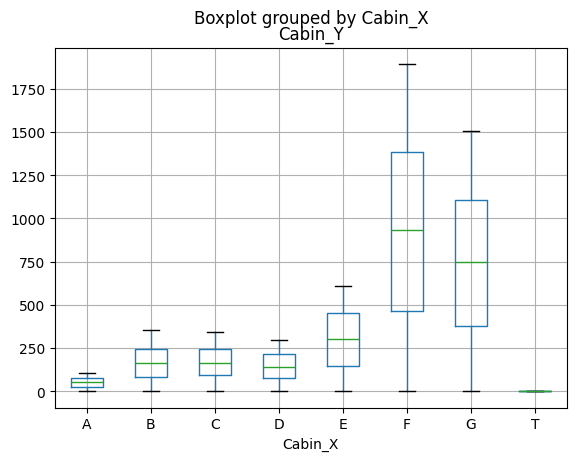

In [22]:
train_full.boxplot(column='Cabin_Y', by='Cabin_X');

##### Well, this graph just tell me that cabin groups F and G were the biggest. It seems like that middle number is a kind of a serial number. If my interpretations are correct, and despite having close number ##### of total cabins, cabin group F had much worse rate of survival than G, for some reason.

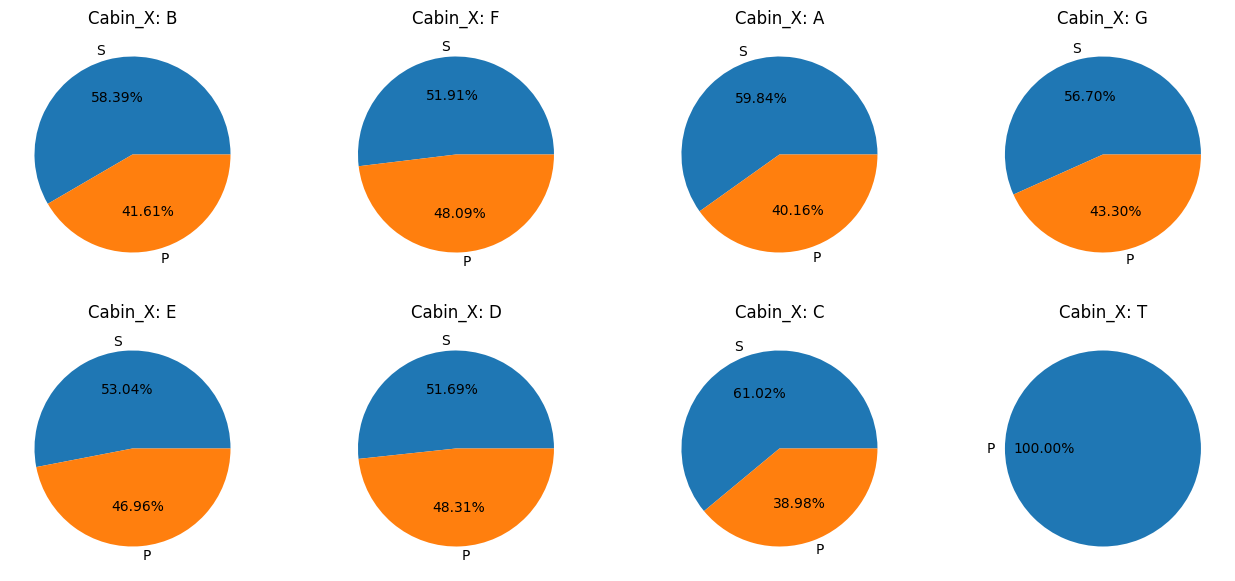

In [23]:
all_cab_x = train_full.loc[~train_full.Cabin_X.isna()].Cabin_X.unique()
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
for i, x in enumerate(all_cab_x):
    train_full.loc[train_full.Transported].loc[train_full.Cabin_X == x]['Cabin_Z'].value_counts().plot.pie(title=f'Cabin_X: {x}', ax=axs[i // 4][i % 4], autopct='%1.2f%%', ylabel='')

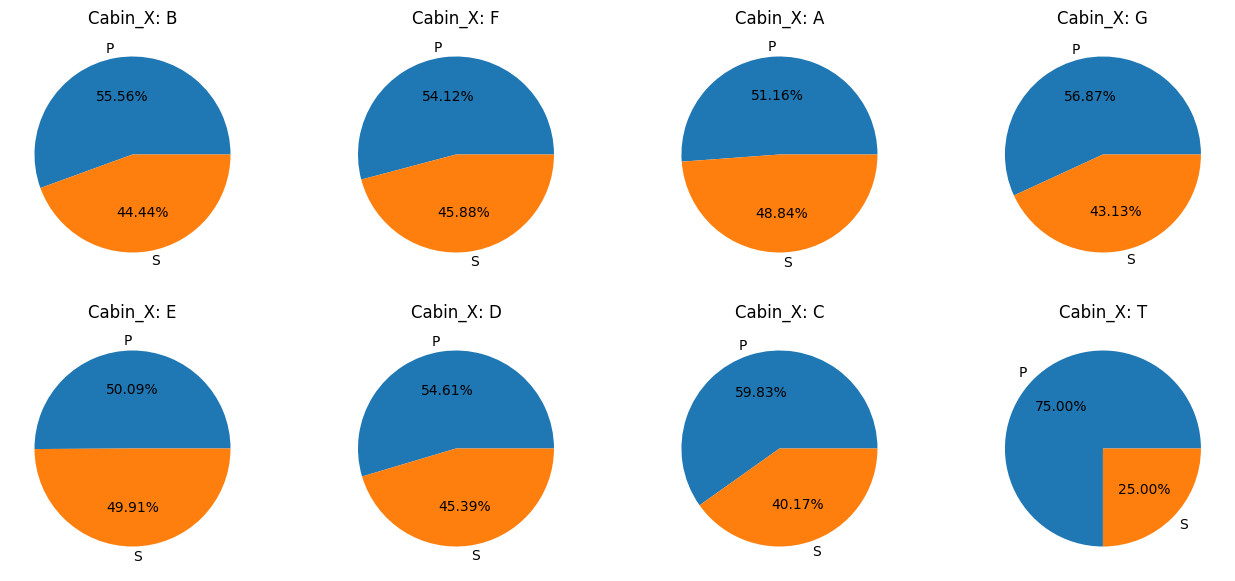

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
for i, x in enumerate(all_cab_x):
    train_full.loc[~train_full.Transported].loc[train_full.Cabin_X == x]['Cabin_Z'].value_counts().plot.pie(title=f'Cabin_X: {x}', ax=axs[i // 4][i % 4], autopct='%1.2f%%', ylabel='')

##### There is not much difference between the distributions of the last part of the cabin number in the surviving group vs. non-surviving. We can still keep it just in case.

In [25]:
del train_full['Cabin']
del train_full['Cabin_Y']

In [26]:
train_full['GroupId'] = train_full.index.map(lambda pid: pid.split('_')[0])
print(f'>> There was {train_full.GroupId.nunique()} groups on the spaceship')

>> There was 6217 groups on the spaceship


##### Same thing with cabins, one for each 1.3 passengers, which makes it not very descriptive.

In [27]:
del train_full['GroupId']

In [28]:
unique_fnames = train_full.loc[~train_full.Name.isna()].Name.map(lambda n: n.split()[0]).nunique()
unique_lnames = train_full.loc[~train_full.Name.isna()].Name.map(lambda n: n.split()[1]).nunique()
unique_names = train_full.loc[~train_full.Name.isna()].Name.nunique()
print(f'>> Unique Names, First: {unique_fnames}, Last: {unique_lnames}, Full: {unique_names}')

>> Unique Names, First: 2706, Last: 2217, Full: 8473


##### I just let my imagination run wild and thought of a weird correlation between a person's name and their chances of survival, but there are no unique names to begin with.

In [29]:
del train_full['Name']

#### Let's save the clean tarining set

In [30]:
train_labels = train_full[['Transported']]
train_data = train_full.drop('Transported', axis=1)
train_data.to_csv('train_data.csv', index=False, header=False)
train_labels.map(int).to_csv('train_labels.csv', index=False, header=False)